# Monte Carlo Simulation - Parameter series

This file implements a simulation for a series of parameter values, for various specified DGP's. 

A number of dependencies are necessary - particularly the accompanying function files. 

In [1]:
# IMPORT DEPENDENCIES
import numpy as np
import pandas as pd
import os 
import pickle
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import importlib

#Import own files 
import sys 
sys.path.append(r'F:\Documents\TheEnd\Code\Functions')
sys.path.append(r'C:\Users\rbjoe\Dropbox\Kugejl\10.semester\TheEnd\Code\Functions')
import monte_carlo_simulation as mc
import dgp_stuff as dgp
import neural_net as nn
import estimators as est
import summaries as smr
import auxilliary as aux
import figurez as figz
import tablez as tblz


###############################################################################
# Load parameters (defined in simulation file)
parameters, estimators, g_functions, changing_parameter = \
        mc.MC_load_pars('5_1_v3_reg_prod_2018-06-25') 


changing_parameter['parameter_space'] = [n for n in range(int(2.5*10**2), 10**3+1, int(2.5*10**2))] +\
                                        [n for n in range(int(2.5*10**3), 10**4+1, int(2.5*10**3))] +\
                                        [n for n in range(int(2.5*10**4), 10**5+1, int(2.5*10**4))] #+\
                                        #[n for n in range(int(2.5*10**5), 10**6+1, int(2.5*10**5))]


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
subset1 = list(g_functions.keys())[0:2]
models1 = ['DGP']+list(estimators.keys()) 
subset2 = list(g_functions.keys())[2:4]
models2 = ['DGP']+list(estimators.keys())
figtitle = '5_1_v3_reg_'

### RMSE for probabilities (expectation)


In [3]:
#Calculate RMSE for probabilities. 
prob_rmse = smr.comp_wrapper_parseries_g(smr.comp_rmse, 'res_probs', 
                                        dgp_series = 'res_probs',
                                        g_functions=g_functions, 
                                        parameter_space = changing_parameter['parameter_space'],
                                        filename =  parameters['filename'])



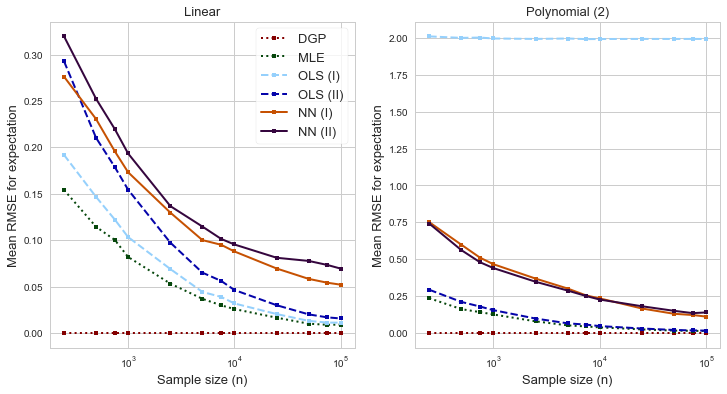

In [4]:
importlib.reload(figz)
figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, g_series = prob_rmse, 
                   g_functions=g_functions,  estimators = estimators,
                   subset = subset1, 
                   models = models1,
                   save_file=True, filename = figtitle+'prob_RMSE_1',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   legend = 'first',
                   xlabel = 'Sample size (n)', ylabel= 'Mean RMSE for expectation', 
                   )


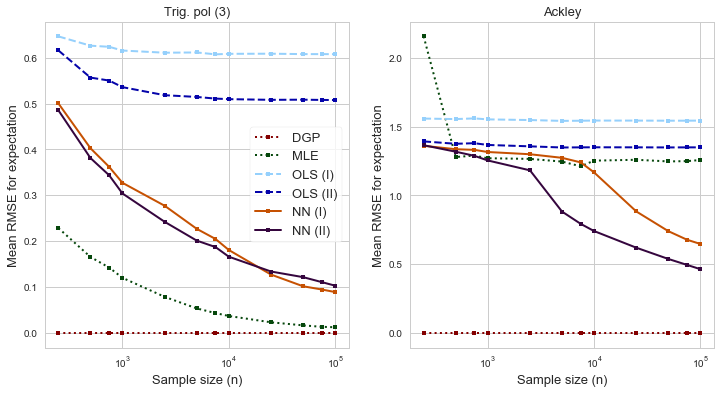

In [5]:

figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, g_series = prob_rmse, 
                   g_functions=g_functions,  estimators = estimators,
                   subset = subset2, 
                   models = models2,
                   save_file=True, filename = figtitle+'prob_RMSE_2',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   legend = 'first',
                   xlabel = 'Sample size (n)', ylabel= 'Mean RMSE for expectation', 
                   )


### Mean ME (bias) for marginal effects

In [6]:
#Calculate MME for marginal effects 
res_mme = smr.comp_wrapper_parseries_g(smr.comp_mme, 'res_mrgeffs', 
                                       dgp_series = 'res_mrgeffs',
                                       g_functions=g_functions, 
                                       comp_kws = {'coefficient':1}, #Look at one beta.
                                       filename =  parameters['filename'], 
                                       parameter_space = changing_parameter['parameter_space'])

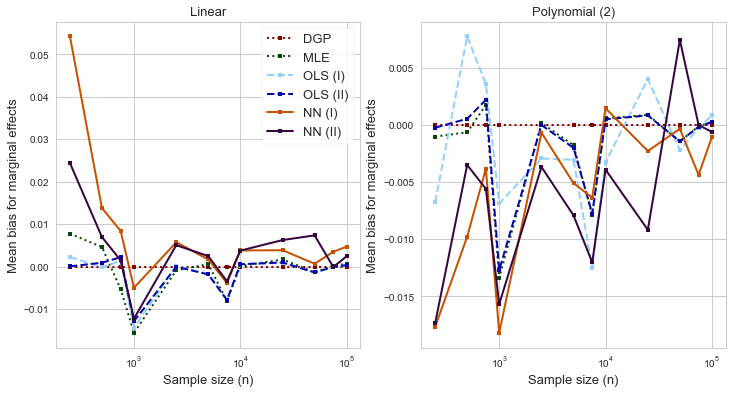

In [7]:
figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, g_series = res_mme, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset1, 
                   models = models1,
                   save_file=True, filename = figtitle+'mrg_ME_1',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   legend = 'first',
                   xlabel = 'Sample size (n)', ylabel= 'Mean bias for marginal effects', 
                   #ymin = -0.025, ymax = 0.025
                   )

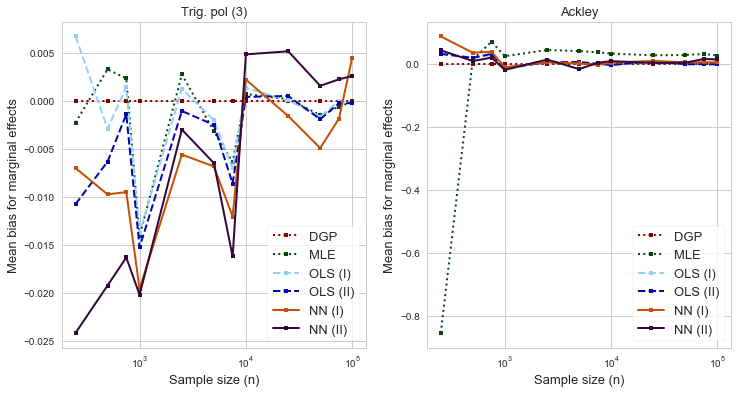

In [8]:
figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, g_series = res_mme, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset2, 
                   models = models2,
                   save_file=True, filename = figtitle+'mrg_ME_2',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   xlabel = 'Sample size (n)', ylabel= 'Mean bias for marginal effects', 
                   #ymin = -0.025, ymax = 0.025
                   )

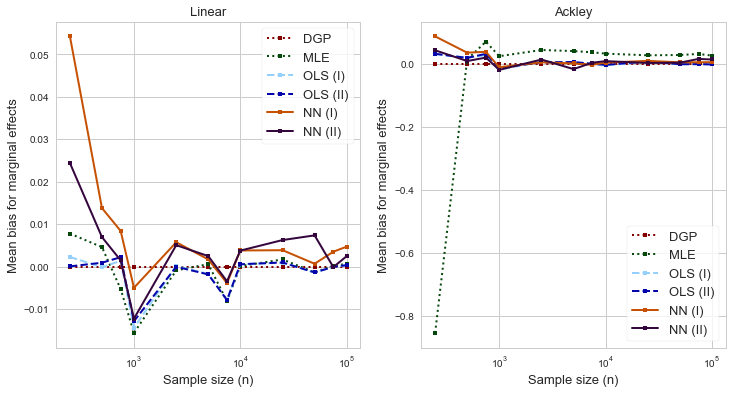

In [9]:
figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, g_series = res_mme, 
                   g_functions=g_functions, estimators = estimators,
                   subset = [list(g_functions.keys())[i] for i in [0,3]],
                   models = models2,
                   save_file=True, filename = figtitle+'mrg_ME_3',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   xlabel = 'Sample size (n)', ylabel= 'Mean bias for marginal effects', 
                   #ymin = -0.025, ymax = 0.025
                   )

### Mean MSE for marginal effects 

In [10]:
#Calculate MMSE
res_mmse = smr.comp_wrapper_parseries_g(smr.comp_mmse, 'res_mrgeffs', 
                                       dgp_series = 'res_mrgeffs', 
                                       g_functions = g_functions, 
                                       filename =  parameters['filename'],
                                       parameter_space = changing_parameter['parameter_space'])

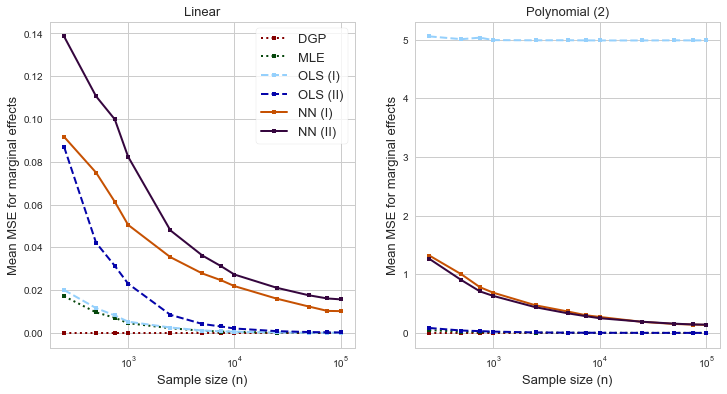

In [11]:
#Show figure 
figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, g_series = res_mmse, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset1, 
                   models = models1,
                   save_file=True, filename = figtitle+'mrg_MMSE_1',
                   legend = 'first',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   xlabel = 'Sample size (n)', ylabel= 'Mean MSE for marginal effects', 
                   )

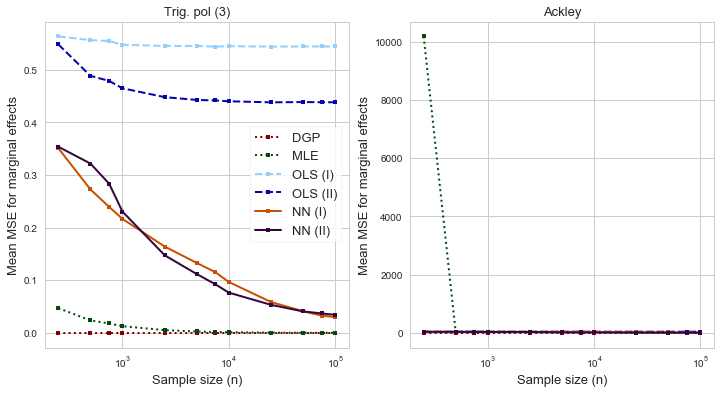

In [12]:
#Show figure 
figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, g_series = res_mmse, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset2, 
                   models = models2,
                   save_file=True, filename = figtitle+'mrg_MMSE_2',
                   legend = 'first',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   xlabel = 'Sample size (n)', ylabel= 'Mean MSE for marginal effects', 
                   )

### Mean RMSE for marginal effects

In [13]:
#Calculate MRMSE
res_mrmse = smr.comp_wrapper_parseries_g(smr.comp_mrmse, 'res_mrgeffs', 
                                       dgp_series = 'res_mrgeffs', 
                                       g_functions=g_functions, 
                                       filename =  parameters['filename'], 
                                       parameter_space = changing_parameter['parameter_space'])

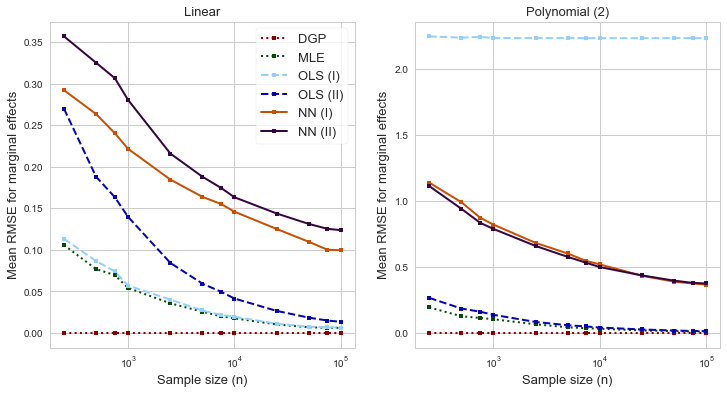

In [14]:
#Show figure 
figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, g_series = res_mrmse, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset1, 
                   models = models1,
                   save_file=True, filename = figtitle+'mrg_MRMSE_1',
                   legend = 'first',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   xlabel = 'Sample size (n)', ylabel= 'Mean RMSE for marginal effects', 
                   )

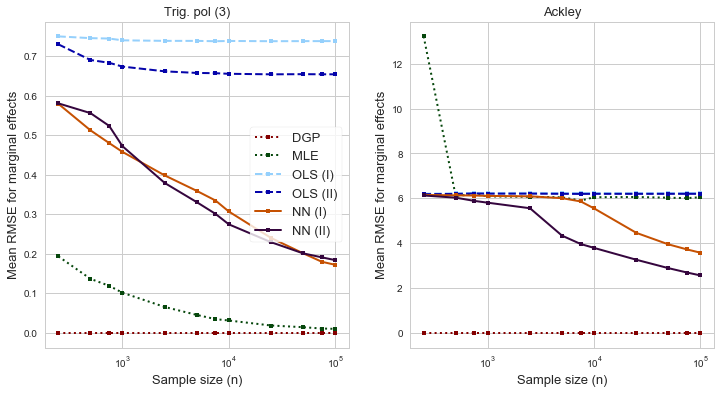

In [15]:
#Show figure 
figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, g_series = res_mrmse, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset2, 
                   models = models2,
                   save_file=True, filename = figtitle+'mrg_MRMSE_2',
                   legend = 'first',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   xlabel = 'Sample size (n)', ylabel= 'Mean RMSE for marginal effects', 
                   )

### MSE for average marginal effects 


In [16]:
res_mse_avg = smr.comp_wrapper_parseries_g(smr.comp_mse_avg, 'res_mrgeffs', 
                                       dgp_series = 'res_mrgeffs',
                                       g_functions=g_functions, 
                                       filename =  parameters['filename'],
                                       parameter_space = changing_parameter['parameter_space'])


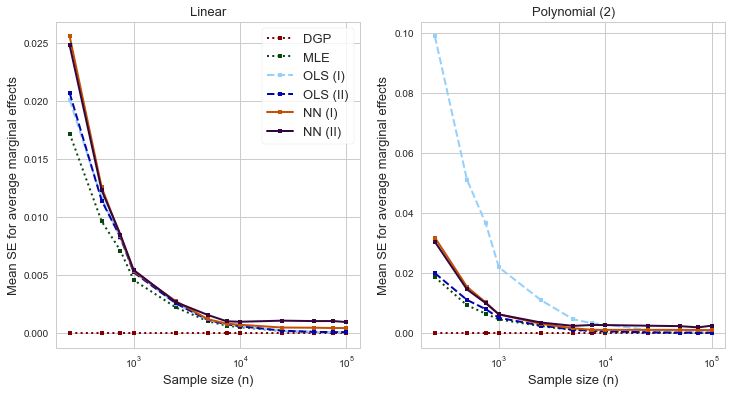

In [17]:
figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, g_series = res_mse_avg, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset1, 
                   models = models1,
                   save_file=True, filename = figtitle+'mrg_avg_MSE_1',
                   legend = 'first',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   xlabel = 'Sample size (n)', ylabel= 'Mean SE for average marginal effects', 
                   )

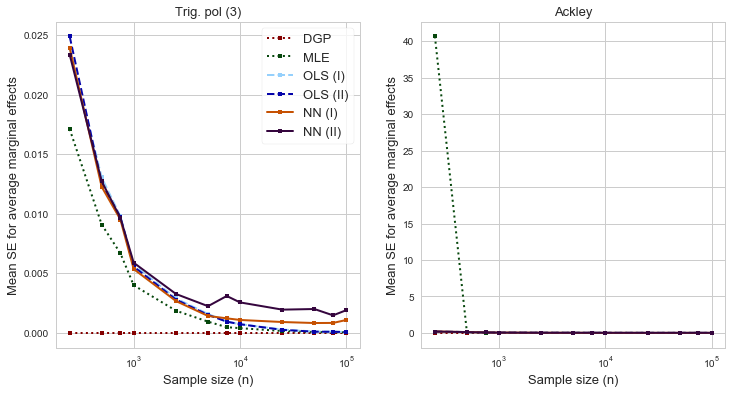

In [18]:
figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, g_series = res_mse_avg, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset2, 
                   models = models2,
                   save_file=True, filename = figtitle+'mrg_avg_MSE_2',
                   legend = 'first',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   xlabel = 'Sample size (n)', ylabel= 'Mean SE for average marginal effects', 
                   )

### MRSE for average marginal effects 


In [19]:
res_mrse_avg = smr.comp_wrapper_parseries_g(smr.comp_mrse_avg, 'res_mrgeffs', 
                                       dgp_series = 'res_mrgeffs', 
                                       g_functions=g_functions, 
                                       filename =  parameters['filename'],
                                       parameter_space = changing_parameter['parameter_space'])


------------------------------------------------------------------------
MRSE (Average marginal effects)


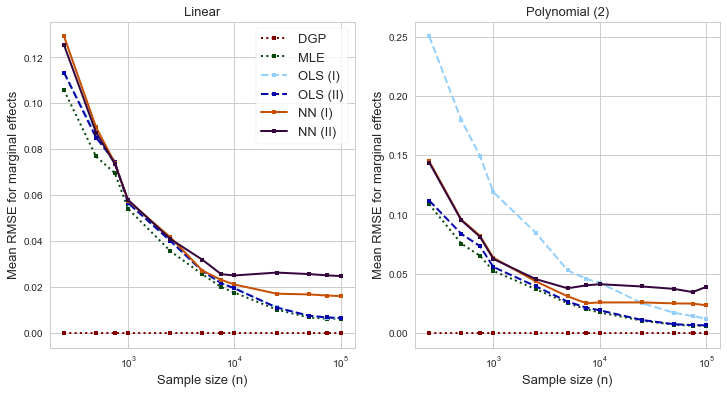

In [20]:
print('------------------------------------------------------------------------')
print('MRSE (Average marginal effects)')
figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, g_series = res_mrse_avg, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset1, 
                   models = models1,
                   save_file=True, filename = figtitle+'mrg_avg_MRSE_1',
                   legend = 'first',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   xlabel = 'Sample size (n)', ylabel= 'Mean RMSE for marginal effects', 
                   )

------------------------------------------------------------------------
MRSE (Average marginal effects)


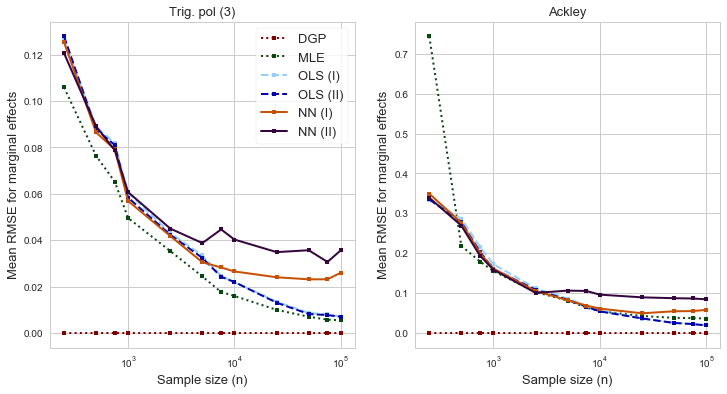

In [21]:
print('------------------------------------------------------------------------')
print('MRSE (Average marginal effects)')
figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, g_series = res_mrse_avg, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset2, 
                   models = models2,
                   save_file=True, filename = figtitle+'mrg_avg_MRSE_2',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   legend = 'first',
                   xlabel = 'Sample size (n)', ylabel= 'Mean RMSE for marginal effects', 
                   )